In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd

pd.options.display.max_colwidth = 500

compute_samples = pd.read_csv('../sourmash/lung_cancer_v4/compute/samples.csv')
print(compute_samples.shape)
compute_samples.head()

(5054, 10)


,id,read1,read2,name,output,trim_low_abundance_kmers,dna,protein,ksizes,scaled
0,A10_B000419_S34,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000419_S34/A10_B000419_S34_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000419_S34/A10_B000419_S34_R2_001.fastq.gz,A10_B000419_S34,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B000419_S34.signature,True,True,True,"21,27,33,51",1000
1,A10_B000420_S82,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000420_S82/A10_B000420_S82_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000420_S82/A10_B000420_S82_R2_001.fastq.gz,A10_B000420_S82,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B000420_S82.signature,True,True,True,"21,27,33,51",1000
2,A10_B002073_S166,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002073_S166/A10_B002073_S166_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002073_S166/A10_B002073_S166_R2_001.fastq.gz,A10_B002073_S166,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B002073_S166.signature,True,True,True,"21,27,33,51",1000
3,A10_B002078_S202,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002078_S202/A10_B002078_S202_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002078_S202/A10_B002078_S202_R2_001.fastq.gz,A10_B002078_S202,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B002078_S202.signature,True,True,True,"21,27,33,51",1000
4,A10_B002095_S118,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002095_S118/A10_B002095_S118_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002095_S118/A10_B002095_S118_R2_001.fastq.gz,A10_B002095_S118,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B002095_S118.signature,True,True,True,"21,27,33,51",1000


In [83]:
! aws s3 ls s3://olgabot-maca/lung_cancer/sourmash_search/

                           PRE tabula-muris-k51-protein/


In [7]:
prefix = 's3://olgabot-maca/lung_cancer/sourmash_search/tabula-muris-k51-protein'
txt = 'lung_cancer_sourmash_search.txt'

! aws s3 ls $prefix/ > $txt
! cat $txt

2018-09-21 01:44:08    6950640 C14_B003528_S62_ignore-abundance=False.csv
2018-09-21 02:34:07    6946710 D1_B003125_S25_ignore-abundance=False.csv
2018-09-21 02:33:48    6948400 E19_B003570_S199_ignore-abundance=False.csv
2018-09-21 01:42:18    6963864 F21_B000420_S213_ignore-abundance=False.csv
2018-09-21 02:34:07    6936877 G10_B003586_S142_ignore-abundance=False.csv
2018-09-21 01:46:01    6936580 G4_B003570_S232_ignore-abundance=False.csv
2018-09-21 02:34:07    6939393 G9_B003511_S57_ignore-abundance=False.csv
2018-09-21 02:33:25    6935710 H7_B003588_S211_ignore-abundance=False.csv
2018-09-21 02:34:08    6947459 I22_B002095_S22_ignore-abundance=False.csv
2018-09-21 02:33:32    6956092 I3_B003573_S63_ignore-abundance=False.csv
2018-09-21 02:34:07    6948876 J11_B003573_S95_ignore-abundance=False.csv
2018-09-21 02:33:19    6938459 J8_B003528_S224_ignore-abundance=False.csv
2018-09-21 01:48:07    6949495 K7_B002073_S103_ignore-abundance=False.csv
2018-09-21 02:34:07    6939320 L16_B00

In [8]:
aws_s3_ls = pd.read_table(txt, 
                          delim_whitespace=True, header=None, 
                          names=['date', 'time', 'bytes', 'basename'])
print(aws_s3_ls.shape)
aws_s3_ls.head()

(22, 4)


,date,time,bytes,basename
0,2018-09-21,01:44:08,6950640,C14_B003528_S62_ignore-abundance=False.csv
1,2018-09-21,02:34:07,6946710,D1_B003125_S25_ignore-abundance=False.csv
2,2018-09-21,02:33:48,6948400,E19_B003570_S199_ignore-abundance=False.csv
3,2018-09-21,01:42:18,6963864,F21_B000420_S213_ignore-abundance=False.csv
4,2018-09-21,02:34:07,6936877,G10_B003586_S142_ignore-abundance=False.csv


In [9]:
df = pd.read_csv(f'{prefix}/D1_B003125_S25_ignore-abundance=False.csv')
print(df.shape)
df.head()

(36295, 4)


,similarity,name,filename,md5
0,0.316674,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,7eaedc3ea86056aca4353152544cfff4
1,0.308141,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,9c2251f947b9a9faf1cad898f2b1a0a1
2,0.307184,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,942b9c25aed5b57d64572cdcbd8d3343
3,0.304018,cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,5e9de85eef4edef22566bb3eb1efc23b
4,0.302058,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,2e4adc68cd4fd8e1c6119571c859ca71


In [10]:
pattern = '(?P<sample_id>[\w]+)_ignore-abundance=(?P<ignore_abundance>True|False).csv'

sample_id_abundance = aws_s3_ls.basename.str.extract(pattern)
print(sample_id_abundance.shape)
sample_id_abundance.head()

(22, 2)


,sample_id,ignore_abundance
0,C14_B003528_S62,False
1,D1_B003125_S25,False
2,E19_B003570_S199,False
3,F21_B000420_S213,False
4,G10_B003586_S142,False


In [11]:
sorted(sample_id_abundance.sample_id.values)

['C14_B003528_S62',
 'D1_B003125_S25',
 'E19_B003570_S199',
 'F21_B000420_S213',
 'G10_B003586_S142',
 'G4_B003570_S232',
 'G9_B003511_S57',
 'H7_B003588_S211',
 'I22_B002095_S22',
 'I3_B003573_S63',
 'J11_B003573_S95',
 'J8_B003528_S224',
 'K7_B002073_S103',
 'L16_B003588_S16',
 'L5_B003588_S5',
 'M1_B000420_S61',
 'M23_B002097_S251',
 'M23_B002097_S251',
 'N15_B000420_S99',
 'O3_B003573_S207',
 'P14_B000420_S146',
 'P2_B003125_S14']

In [12]:
aws_s3_ls_ids = pd.concat([aws_s3_ls, sample_id_abundance], axis=1)
aws_s3_ls_ids.head()

,date,time,bytes,basename,sample_id,ignore_abundance
0,2018-09-21,01:44:08,6950640,C14_B003528_S62_ignore-abundance=False.csv,C14_B003528_S62,False
1,2018-09-21,02:34:07,6946710,D1_B003125_S25_ignore-abundance=False.csv,D1_B003125_S25,False
2,2018-09-21,02:33:48,6948400,E19_B003570_S199_ignore-abundance=False.csv,E19_B003570_S199,False
3,2018-09-21,01:42:18,6963864,F21_B000420_S213_ignore-abundance=False.csv,F21_B000420_S213,False
4,2018-09-21,02:34:07,6936877,G10_B003586_S142_ignore-abundance=False.csv,G10_B003586_S142,False


In [13]:
dfs = []

for i, row in aws_s3_ls_ids.iterrows():
    basename = row.basename
    
    sample_id = basename.split()
    df = pd.read_csv(f'{prefix}/{basename}')
    df['query_sample_id'] = row.sample_id
    df['ignore_abundance'] = row.ignore_abundance
    dfs.append(df)
search_results = pd.concat(dfs, ignore_index=True)
print(search_results.shape)
search_results.head()

(728873, 6)


,similarity,name,filename,md5,query_sample_id,ignore_abundance
0,0.500983,cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1,tabula-muris-k51-protein,3117952b86d451cb92e6336531316c17,C14_B003528_S62,False
1,0.500967,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,3c5b05b218dc4bfdc197426bc838fed8,C14_B003528_S62,False
2,0.500855,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,64ef4f62c0d0b1377c2cbf5f135f314f,C14_B003528_S62,False
3,0.500827,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,e4a3ceeaeff81c54fe23210e460e6ded,C14_B003528_S62,False
4,0.500819,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,a8a5aa310cbb862741fc88fac1052c32,C14_B003528_S62,False


In [14]:
pattern = '(?P<column>\w+):(?P<value>[\w-]+)'

df = search_results.name.head().str.extractall(pattern)
df.reset_index().pivot(index='level_0', columns='column', values='value')

column,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
level_0,,,,,
0,H11-B002314-3_56_F-1-1,myeloid_cell,nan,MAT,Fat
1,H6-MAA001871-3_39_F-1-1,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell,Proximal,Large_Intestine
2,M4-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine
3,E6-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine
4,L12-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine


In [15]:
%%file extract_metadata.py
import pandas as pd

def combine_cell_ontology_free_annotation(row):
    if pd.notnull(row['free_annotation']):
        return '{cell_ontology_class} ({free_annotation})'.format(**row)
    else:
        return row['cell_ontology_class']


def extract_cell_metadata(name_column, pattern='(?P<column>\w+):(?P<value>[\w-]+)'):
    expanded = name_column.str.extractall(pattern)
    expanded_index = expanded.reset_index()
    annotations = expanded_index.pivot(columns='column', values='value', index='level_0')
    annotations['cell_ontology_free_annotation'] = annotations.apply(
        combine_cell_ontology_free_annotation, axis=1)
    return annotations 


def to_key_value_pair(attribute):
    if len(attribute) > 1:
        try:
            return attribute[0], int(attribute[1])
        except ValueError:
            return attribute[0], attribute[1] 
    else:
        return 'comparison_sequence', attribute[0]


def extract_experiment_metadata(basename):
    key = basename.split('.csv')[0]
    split = key.split('_')
    attributes = [x.split('=') for x in split]
    attributes = dict(to_key_value_pair(x) for x in attributes)
    return key, attributes

Overwriting extract_metadata.py


In [16]:
import extract_metadata

cell_metadata = extract_metadata.extract_cell_metadata(search_results.name)
print(cell_metadata.shape)
cell_metadata.head()

(590291, 6)


column,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
level_0,,,,,,
0,H11-B002314-3_56_F-1-1,myeloid_cell,nan,MAT,Fat,myeloid_cell (nan)
1,H6-MAA001871-3_39_F-1-1,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell,Proximal,Large_Intestine,epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)
2,M4-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)
3,E6-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)
4,L12-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)


In [17]:
search_results_metadata = search_results.join(cell_metadata)
print(search_results_metadata.shape)
search_results_metadata.head()

(728873, 12)


,similarity,name,filename,md5,query_sample_id,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,0.500983,cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1,tabula-muris-k51-protein,3117952b86d451cb92e6336531316c17,C14_B003528_S62,False,H11-B002314-3_56_F-1-1,myeloid_cell,nan,MAT,Fat,myeloid_cell (nan)
1,0.500967,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,3c5b05b218dc4bfdc197426bc838fed8,C14_B003528_S62,False,H6-MAA001871-3_39_F-1-1,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell,Proximal,Large_Intestine,epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)
2,0.500855,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,64ef4f62c0d0b1377c2cbf5f135f314f,C14_B003528_S62,False,M4-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)
3,0.500827,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,e4a3ceeaeff81c54fe23210e460e6ded,C14_B003528_S62,False,E6-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)
4,0.500819,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,a8a5aa310cbb862741fc88fac1052c32,C14_B003528_S62,False,L12-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


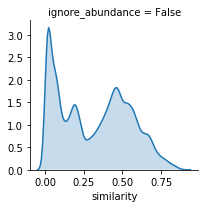

In [18]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results, col='ignore_abundance')
g.map(sns.kdeplot, 'similarity', shade=True)

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


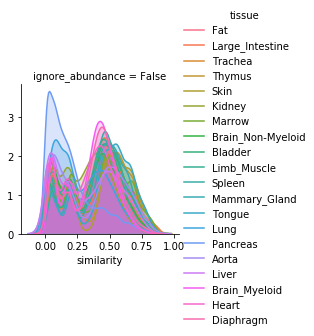

In [22]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata, col='ignore_abundance', hue='tissue')
g.map(sns.kdeplot, 'similarity', shade=True)
g.add_legend()

### Use only cells with a median similarity to somthing > 0.5

In [96]:
search_results_metadata_top = search_results_metadata.groupby('query_sample_id').filter(
    lambda x: x['similarity'].median() > 0.25)
print(search_results_metadata_top.shape)
search_results_metadata_top.head()

(547740, 12)


,similarity,name,filename,md5,query_sample_id,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,0.500983,cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1,tabula-muris-k51-protein,3117952b86d451cb92e6336531316c17,C14_B003528_S62,False,H11-B002314-3_56_F-1-1,myeloid_cell,nan,MAT,Fat,myeloid_cell (nan)
1,0.500967,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,3c5b05b218dc4bfdc197426bc838fed8,C14_B003528_S62,False,H6-MAA001871-3_39_F-1-1,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell,Proximal,Large_Intestine,epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)
2,0.500855,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,64ef4f62c0d0b1377c2cbf5f135f314f,C14_B003528_S62,False,M4-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)
3,0.500827,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,e4a3ceeaeff81c54fe23210e460e6ded,C14_B003528_S62,False,E6-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)
4,0.500819,cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,a8a5aa310cbb862741fc88fac1052c32,C14_B003528_S62,False,L12-MAA001872-3_39_F-1-1,large_intestine_goblet_cell,Goblet_cell_,Proximal,Large_Intestine,large_intestine_goblet_cell (Goblet_cell_)


In [97]:
grouped = search_results_metadata_top.groupby('query_sample_id')

cols = ['similarity', 'tissue', 'cell_ontology_free_annotation']

grouped.apply(lambda x: x.nlargest(5, 'similarity')[cols])

similarity           tissue  \
query_sample_id                                        
C14_B003528_S62  0         0.500983              Fat   
                 1         0.500967  Large_Intestine   
                 2         0.500855  Large_Intestine   
                 3         0.500827  Large_Intestine   
                 4         0.500819  Large_Intestine   
E19_B003570_S199 72803     0.546124  Large_Intestine   
                 72804     0.546072  Large_Intestine   
                 72805     0.545626  Large_Intestine   
                 72806     0.545288  Large_Intestine   
                 72807     0.545147  Large_Intestine   
G4_B003570_S232  182012    0.812243              NaN   
                 182013    0.811398          Trachea   
                 182014    0.811105              NaN   
                 182015    0.810452  Large_Intestine   
                 182016    0.810416  Large_Intestine   
H7_B003588_S211  254594    0.891271              NaN   
                 254595    0.889722          Trachea   
                 254596    0.889588              NaN   
                 254597    0.888009  Large_Intestine   
                 254598    0.887346          Trachea   
I22_B002095_S22  291059    0.592673  Large_Intestine   
                 291060    0.592599  Large_Intestine   
                 291061    0.592340  Large_Intestine   
                 291062    0.592095  Large_Intestine   
                 291063    0.591839  Large_Intestine   
I3_B003573_S63   327608    0.565487    Brain_Myeloid   
                 327609    0.544368              NaN   
                 327610    0.543023           Kidney   
                 327611    0.541401    Brain_Myeloid   
                 327612    0.541156    Brain_Myeloid   
...                             ...              ...   
L16_B003588_S16  473762    0.701881              Fat   
                 473763    0.701876  Large_Intestine   
                 473764    0.701798  Large_Intestine   
                 473765    0.701781  Large_Intestine   
                 473766    0.701701  Large_Intestine   
L5_B003588_S5    510252    0.889970              NaN   
                 510253    0.888685          Trachea   
                 510254    0.888425              NaN   
                 510255    0.886891  Large_Intestine   
                 510256    0.886377          Trachea   
M1_B000420_S61   546749    0.614689              NaN   
                 546750    0.613387  Large_Intestine   
                 546751    0.613202      Limb_Muscle   
                 546752    0.611927          Trachea   
                 546753    0.611687              NaN   
N15_B000420_S99  583305    0.752688              Fat   
                 583306    0.752443          Trachea   
                 583307    0.751850              NaN   
                 583308    0.751796          Trachea   
                 583309    0.751449              NaN   
O3_B003573_S207  619848    0.625473              Fat   
                 619849    0.625237  Large_Intestine   
                 619850    0.625093  Large_Intestine   
                 619851    0.625009          Trachea   
                 619852    0.624919  Large_Intestine   
P14_B000420_S146 656272    0.704126          Trachea   
                 656273    0.704124              NaN   
                 656274    0.704096              NaN   
                 656275    0.703480              Fat   
                 656276    0.703317  Large_Intestine   

                                                                       cell_ontology_free_annotation  
query_sample_id                                                                                       
C14_B003528_S62  0                                                                myeloid_cell (nan)  
                 1       epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)  
                 2                                        large_intestine_goblet_cel

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


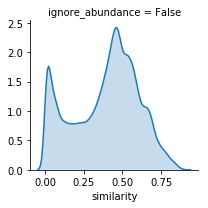

In [98]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata_top, col='ignore_abundance')
g.map(sns.kdeplot, 'similarity', shade=True)

## Look at median cell ontology per cell

In [99]:
median_cell_ontology = search_results_metadata_top.groupby(['query_sample_id', "cell_ontology_class"])['similarity'].median()
median_cell_ontology = median_cell_ontology.unstack()
median_cell_ontology = median_cell_ontology.T
print(median_cell_ontology.shape)
median_cell_ontology.head()

(82, 15)


query_sample_id,C14_B003528_S62,E19_B003570_S199,G4_B003570_S232,H7_B003588_S211,I22_B002095_S22,I3_B003573_S63,J11_B003573_S95,J8_B003528_S224,K7_B002073_S103,L16_B003588_S16,L5_B003588_S5,M1_B000420_S61,N15_B000420_S99,O3_B003573_S207,P14_B000420_S146
cell_ontology_class,,,,,,,,,,,,,,,
B_cell,0.408400,0.443318,0.583363,0.606427,0.476116,0.444001,0.384751,0.545013,0.467907,0.536913,0.608273,0.492330,0.566663,0.489738,0.537847
Bergmann_glial_cell,0.354239,0.382745,0.498738,0.517108,0.410480,0.414135,0.335582,0.469662,0.400728,0.462825,0.517400,0.423162,0.485759,0.424743,0.461764
Brush_cell_of_epithelium_proper_of_large_intestine,0.484145,0.525380,0.759176,0.811287,0.569243,0.461709,0.451541,0.685895,0.553758,0.669583,0.811162,0.585868,0.713756,0.600559,0.670235
DN1_thymic_pro-T_cell,0.457115,0.498866,0.675051,0.707071,0.537555,0.468619,0.431316,0.623186,0.517366,0.614700,0.709580,0.546818,0.646869,0.555517,0.611178
Kupffer_cell,0.420838,0.461157,0.608241,0.633931,0.494950,0.482077,0.405636,0.570767,0.480265,0.565280,0.634626,0.503174,0.588352,0.511882,0.557938


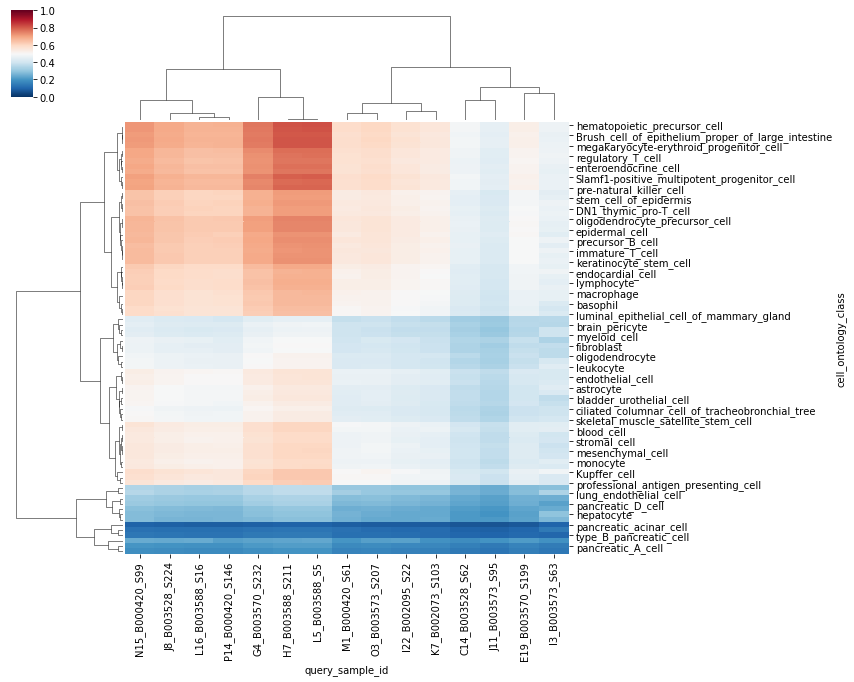

In [100]:
sns.clustermap(median_cell_ontology, cmap='RdBu_r', center=0.5, vmin=0, vmax=1)

`N15_B000420_S99` seems like a "good cell" that's similar to a lot of things

In [68]:
good_cell = "N15_B000420_S99"

search_results_metadata.query('query_sample_id == @good_cell').head()

,similarity,name,filename,md5,query_sample_id,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
583305,0.752688,cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1,tabula-muris-k51-protein,3117952b86d451cb92e6336531316c17,N15_B000420_S99,False,H11-B002314-3_56_F-1-1,myeloid_cell,nan,MAT,Fat,myeloid_cell (nan)
583306,0.752443,cell_ontology_class:epithelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:O4-MAA001867-3_39_F-1-1,tabula-muris-k51-protein,effaec44fd29a68d032969c3a4300db1,N15_B000420_S99,False,O4-MAA001867-3_39_F-1-1,epithelial_cell,nan,nan,Trachea,epithelial_cell (nan)
583307,0.751850,L5-D042475-3_9_M-1-1,tabula-muris-k51-protein,7dd0b9383b69726cc374fc0abb56d253,N15_B000420_S99,False,NaN,NaN,NaN,NaN,NaN,NaN
583308,0.751796,cell_ontology_class:epithelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:J2-MAA001865-3_38_F-1-1,tabula-muris-k51-protein,7204e7113d68c3bf08898ca38ba518cd,N15_B000420_S99,False,J2-MAA001865-3_38_F-1-1,epithelial_cell,nan,nan,Trachea,epithelial_cell (nan)
583309,0.751449,L12-MAA001865-3_38_F-1-1,tabula-muris-k51-protein,8ed1bcbf788adeb64c9ca50a651c8058,N15_B000420_S99,False,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
compute_samples.query('id == @good_cell')

,id,read1,read2,name,output,trim_low_abundance_kmers,dna,protein,ksizes,scaled
4176,N15_B000420_S99,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/N15_B000420_S99/N15_B000420_S99_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/N15_B000420_S99/N15_B000420_S99_R2_001.fastq.gz,N15_B000420_S99,s3://olgabot-maca/lung_cancer/sourmash_v4/N15_B000420_S99.signature,True,True,True,"21,27,33,51",1000


In [71]:
! aws s3 ls --human-readable s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/N15_B000420_S99/

2018-05-19 02:03:10  428.9 MiB N15_B000420_S99_R1_001.fastq.gz
2018-05-19 02:03:10  458.1 MiB N15_B000420_S99_R2_001.fastq.gz


`D1_B003125_S25` seems like a weird bad cell that's not similar to anything

In [75]:
bad_cell = "D1_B003125_S25"
search_results_metadata.query('query_sample_id == @bad_cell').head()

,similarity,name,filename,md5,query_sample_id,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
36508,0.316674,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,7eaedc3ea86056aca4353152544cfff4,D1_B003125_S25,False,G16-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat,T_cell (nan)
36509,0.308141,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,9c2251f947b9a9faf1cad898f2b1a0a1,D1_B003125_S25,False,E11-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat,T_cell (nan)
36510,0.307184,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,942b9c25aed5b57d64572cdcbd8d3343,D1_B003125_S25,False,D12-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat,T_cell (nan)
36511,0.304018,cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,5e9de85eef4edef22566bb3eb1efc23b,D1_B003125_S25,False,D17-MAA000914-3_9_M-1-1,endothelial_cell,nan,MAT,Fat,endothelial_cell (nan)
36512,0.302058,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,2e4adc68cd4fd8e1c6119571c859ca71,D1_B003125_S25,False,H14-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat,T_cell (nan)


In [80]:
import os

s3_folder = os.path.dirname(compute_samples.query('id == @bad_cell').read1.iloc[0])
s3_folder

's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/D1_B003125_S25'

In [81]:
! aws s3 ls --human-readable $s3_folder/

2018-05-19 01:40:55    3.6 MiB D1_B003125_S25_R1_001.fastq.gz
2018-05-19 01:40:55    3.4 MiB D1_B003125_S25_R2_001.fastq.gz


In [82]:
median_cell_ontology = median_cell_ontology.sort_values(by=median_cell_ontology.columns.tolist(), ascending=False)
median_cell_ontology.head()

query_sample_id,C14_B003528_S62,D1_B003125_S25,E19_B003570_S199,F21_B000420_S213,G10_B003586_S142,G4_B003570_S232,G9_B003511_S57,H7_B003588_S211,I22_B002095_S22,I3_B003573_S63,J11_B003573_S95,J8_B003528_S224,K7_B002073_S103,L16_B003588_S16,L5_B003588_S5,M1_B000420_S61,N15_B000420_S99,O3_B003573_S207,P14_B000420_S146,P2_B003125_S14
cell_ontology_class,,,,,,,,,,,,,,,,,,,,
immature_NK_T_cell,0.489671,0.081454,0.531909,0.201089,0.026166,0.763492,0.019581,0.814876,0.576287,0.474187,0.455872,0.689469,0.560059,0.674663,0.816970,0.591577,0.718876,0.604526,0.675564,0.230377
hematopoietic_precursor_cell,0.489312,0.094412,0.531986,0.202774,0.022128,0.766675,0.015585,0.820098,0.576262,0.473876,0.455537,0.691004,0.561487,0.675714,0.820904,0.592857,0.719653,0.604876,0.676626,0.232710
common_lymphoid_progenitor,0.487614,0.093546,0.530214,0.201919,0.011768,0.762895,0.009071,0.815076,0.575333,0.467343,0.454333,0.687973,0.558502,0.672955,0.816200,0.588563,0.715517,0.602890,0.673421,0.232147
megakaryocyte-erythroid_progenitor_cell,0.487044,0.086246,0.529047,0.201085,0.015556,0.761553,0.011959,0.812711,0.573717,0.470208,0.453169,0.686114,0.556734,0.671015,0.814002,0.586568,0.713483,0.601530,0.672136,0.231534
Slamf1-positive_multipotent_progenitor_cell,0.484603,0.089020,0.526801,0.200457,0.012634,0.751707,0.009922,0.800492,0.570681,0.465290,0.451299,0.679635,0.553334,0.665763,0.801614,0.582748,0.706205,0.596910,0.665803,0.230308


In [46]:
median_cell_ontology = median_cell_ontology.sort_values(by=median_cell_ontology.index.tolist(), axis=1, ascending=False)
median_cell_ontology.head()

query_sample_id,L5_B003588_S5,H7_B003588_S211,G4_B003570_S232,N15_B000420_S99,J8_B003528_S224,P14_B000420_S146,L16_B003588_S16,O3_B003573_S207,M1_B000420_S61,I22_B002095_S22,K7_B002073_S103,E19_B003570_S199,C14_B003528_S62,I3_B003573_S63,J11_B003573_S95,P2_B003125_S14,F21_B000420_S213,D1_B003125_S25,G10_B003586_S142,G9_B003511_S57
cell_ontology_class,,,,,,,,,,,,,,,,,,,,
immature_NK_T_cell,0.816970,0.814876,0.763492,0.718876,0.689469,0.675564,0.674663,0.604526,0.591577,0.576287,0.560059,0.531909,0.489671,0.474187,0.455872,0.230377,0.201089,0.081454,0.026166,0.019581
hematopoietic_precursor_cell,0.820904,0.820098,0.766675,0.719653,0.691004,0.676626,0.675714,0.604876,0.592857,0.576262,0.561487,0.531986,0.489312,0.473876,0.455537,0.232710,0.202774,0.094412,0.022128,0.015585
common_lymphoid_progenitor,0.816200,0.815076,0.762895,0.715517,0.687973,0.673421,0.672955,0.602890,0.588563,0.575333,0.558502,0.530214,0.487614,0.467343,0.454333,0.232147,0.201919,0.093546,0.011768,0.009071
megakaryocyte-erythroid_progenitor_cell,0.814002,0.812711,0.761553,0.713483,0.686114,0.672136,0.671015,0.601530,0.586568,0.573717,0.556734,0.529047,0.487044,0.470208,0.453169,0.231534,0.201085,0.086246,0.015556,0.011959
Slamf1-positive_multipotent_progenitor_cell,0.801614,0.800492,0.751707,0.706205,0.679635,0.665803,0.665763,0.596910,0.582748,0.570681,0.553334,0.526801,0.484603,0.465290,0.451299,0.230308,0.200457,0.089020,0.012634,0.009922


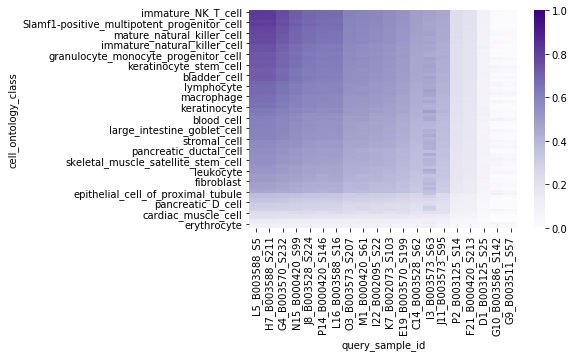

In [51]:
sns.heatmap(median_cell_ontology, cmap='Purples', vmax=1, vmin=0)

In [56]:
import matplotlib.pyplot as plt

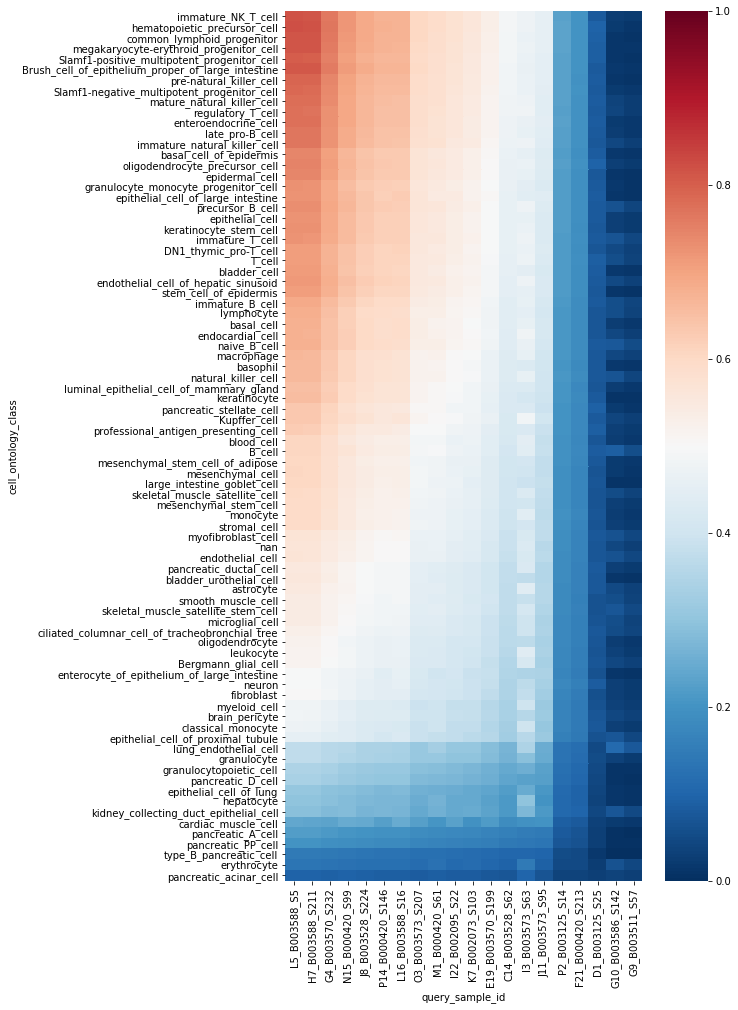

In [61]:
fig, ax = plt.subplots(figsize=(8, 16))
sns.heatmap(median_cell_ontology, cmap='RdBu_r', vmax=1, vmin=0, center=0.5, 
            yticklabels=median_cell_ontology.index, xticklabels=median_cell_ontology.columns)